# EDA 
Analisis Exploratorio de Datos

In [1]:
#importo librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast


In [2]:
#cargo los datos
df_movies= pd.read_csv('./ETL/movies_limpio.csv')
#veo las primeras filas
df_movies.head(3)


C:\Users\clari\AppData\Local\Temp\ipykernel_9020\3838380761.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies= pd.read_csv('./ETL/movies_limpio.csv')


,Unnamed: 0,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,revenue,...,spoken_languages,title,vote_average,vote_count,collection,release_date,release_year,return,release_month,release_day
0,0,30000000,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,373554033.0,...,English,Toy Story,7.7,5415.0,Toy Story Collection,1995-10-30,1995,12.451801,10,30
1,1,65000000,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,TriStar Pictures,United States of America,262797249.0,...,English,Jumanji,6.9,2413.0,NaN,1995-12-15,1995,4.043035,12,15
2,2,0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.7129,Warner Bros.,United States of America,0.0,...,English,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,1995-12-22,1995,0.000000,12,22


In [5]:
#tamaño del conjunto de datos
df_movies.shape

(45291, 21)

In [6]:
#examino columnas y tipos de datos
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45291 entries, 0 to 45290
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            45291 non-null  int64  
 1   budget                45291 non-null  object 
 2   genres                45291 non-null  object 
 3   id                    45291 non-null  object 
 4   original_language     45280 non-null  object 
 5   overview              44352 non-null  object 
 6   popularity            45289 non-null  object 
 7   production_companies  33463 non-null  object 
 8   production_countries  39092 non-null  object 
 9   revenue               45291 non-null  float64
 10  runtime               45042 non-null  float64
 11  spoken_languages      41311 non-null  object 
 12  title                 45288 non-null  object 
 13  vote_average          45288 non-null  float64
 14  vote_count            45288 non-null  float64
 15  collection         

In [7]:
#estadisticas descriptivas
df_movies.describe()

,Unnamed: 0,revenue,runtime,vote_average,vote_count,release_year,return,release_month,release_day
count,45291.000000,4.529100e+04,45042.000000,45288.000000,45288.000000,45291.000000,4.529100e+04,45291.000000,45291.000000
mean,22672.427657,1.125108e+07,94.210048,5.625234,110.293234,1991.865647,6.612815e+02,6.459606,14.209401
std,13097.124449,6.444853e+07,38.290789,1.914648,492.199199,24.062295,7.476335e+04,3.628020,9.284460
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00,1.000000,1.000000
25%,11327.500000,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00,3.000000,6.000000
50%,22671.000000,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00,7.000000,14.000000
75%,34008.500000,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00,10.000000,22.000000
max,45378.000000,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07,12.000000,31.000000


In [8]:
#Identifico columnas con valores faltantes
df_movies.isnull().sum()

Unnamed: 0                  0
budget                      0
genres                      0
id                          0
original_language          11
overview                  939
popularity                  2
production_companies    11828
production_countries     6199
revenue                     0
runtime                   249
spoken_languages         3980
title                       3
vote_average                3
vote_count                  3
collection              42128
release_date                0
release_year                0
return                      0
release_month               0
release_day                 0
dtype: int64

In [9]:
# Sepo los elementos de la lista de géneros en columnas individuales
df_movies['genres'] = df_movies['genres'].apply(eval)
df_generos = pd.DataFrame(df_movies['genres'].tolist(), index=df_movies.index)
#Apilo las columnas para tener una sola columna de género por fila
apilados = df_generos.stack().reset_index(level=1, drop=True).rename('genre')

In [10]:
#calcula el recuento de cada género
cantidad = apilados.value_counts()
cantidad

genre
Drama                                    20226
Comedy                                   13158
Thriller                                  7608
Romance                                   6717
Action                                    6581
Horror                                    4658
Crime                                     4301
Documentary                               3912
Adventure                                 3492
Science Fiction                           3038
Family                                    2762
Mystery                                   2457
Fantasy                                   2304
Animation                                 1928
Foreign                                   1617
Music                                     1597
History                                   1396
War                                       1322
Western                                   1042
TV Movie                                   764
Carousel Productions                         1
Vision 

Análisis Exploratorio

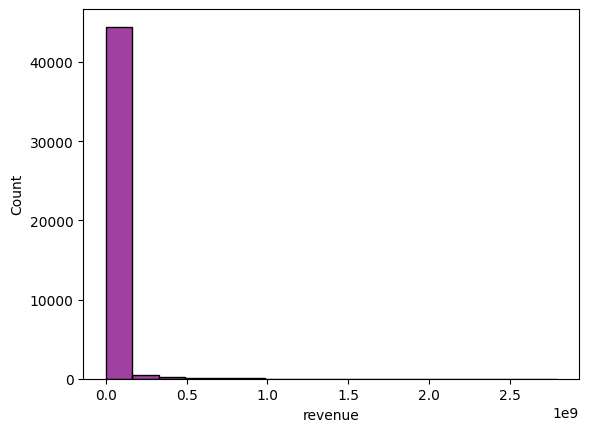

In [11]:
#distribución de variables numéricas relevantes
sns.histplot(df_movies['revenue'], color='purple')
plt.show()

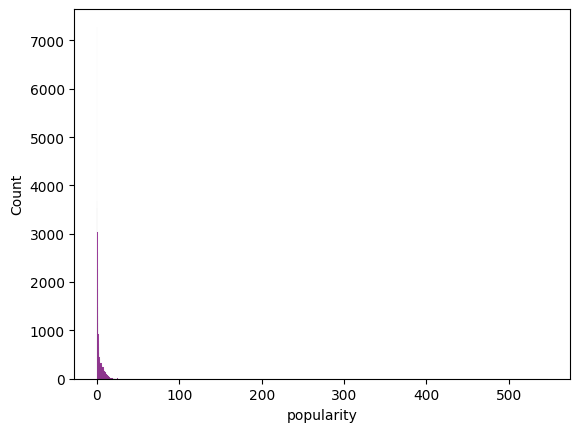

In [11]:
#Hay algunos valores en formato string, como no puedo solo cambiar un valor. Usare pd.to_numeric() para convertir la columna a valores numericos
df_movies['popularity'] = pd.to_numeric(df_movies['popularity'], errors='coerce')
#popularidad de las películas
sns.histplot(df_movies['popularity'], color='purple')
plt.show()

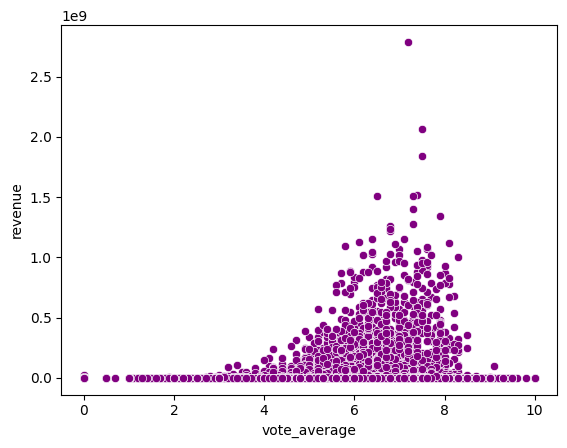

In [12]:
#Visualizacion de las relaciones entre variables
sns.scatterplot(x='vote_average', y='revenue', data=df_movies, color='purple')
plt.show()

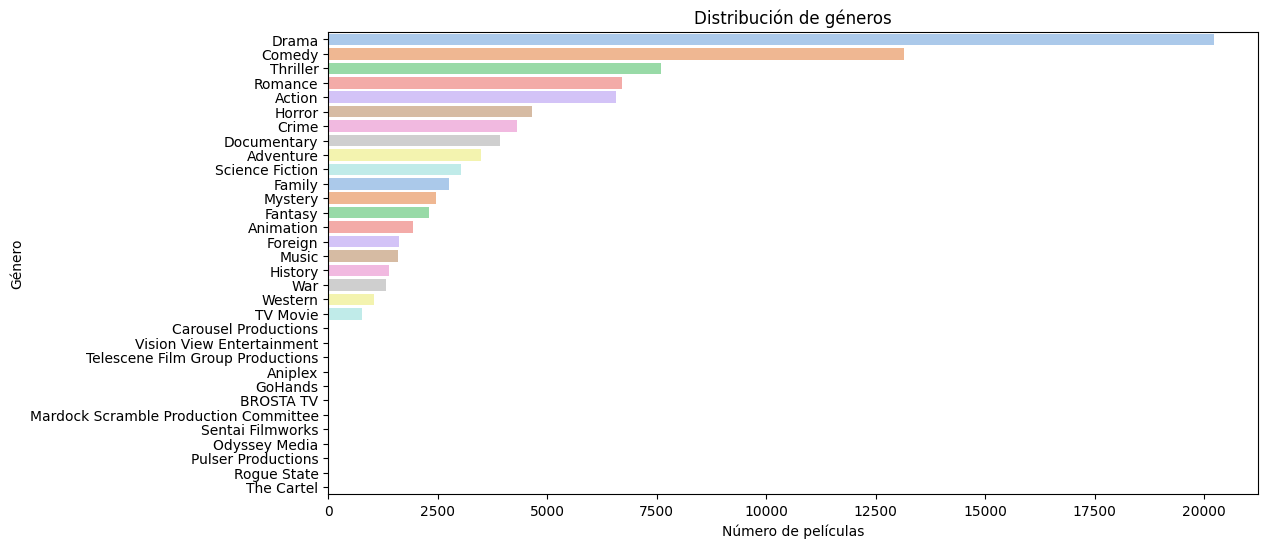

In [13]:
#distribucion de géneros
plt.figure(figsize=(12, 6))
sns.countplot(y=apilados, order=cantidad.index,palette='pastel')
plt.xlabel('Número de películas')
plt.ylabel('Género')
plt.title('Distribución de géneros')
plt.show()

In [14]:
columnas_num= ['revenue', 'popularity', 'vote_average', 'vote_count']
df_movies[columnas_num] = df_movies[columnas_num].apply(pd.to_numeric, errors='coerce')


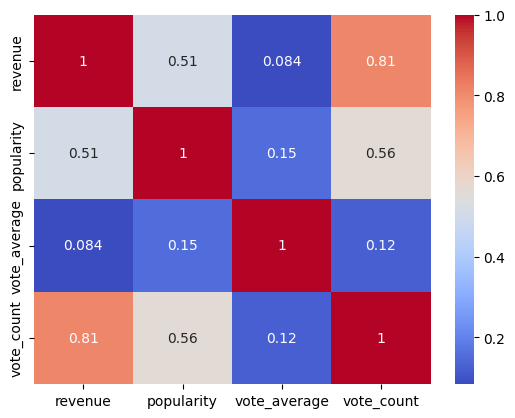

In [15]:
#análisis más profundo
correlation_matrix = df_movies[columnas_num].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Text(0.5, 0, 'Cantidad')

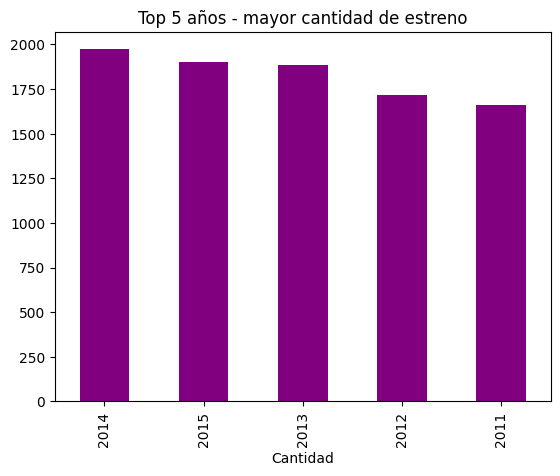

In [16]:
ax  = df_movies['release_year'].value_counts().head(5) \
      .plot(kind='bar', title= 'Top 5 años - mayor cantidad de estreno', color='purple')
ax.set_xlabel('Año de lanzamiento')
ax.set_xlabel('Cantidad')

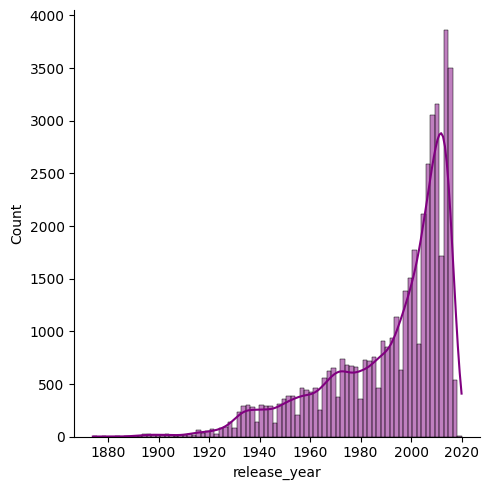

In [17]:
sns.displot(data=df_movies, x=df_movies['release_year'], kde=True, color='purple')

Aca se puede observar como aumento desde 1920 al 2018 el estreno de peliculas y en 2019-2020 disminuyo significativamente debido a la pandemia por COVID-19 que atraveso a todo el mundo.

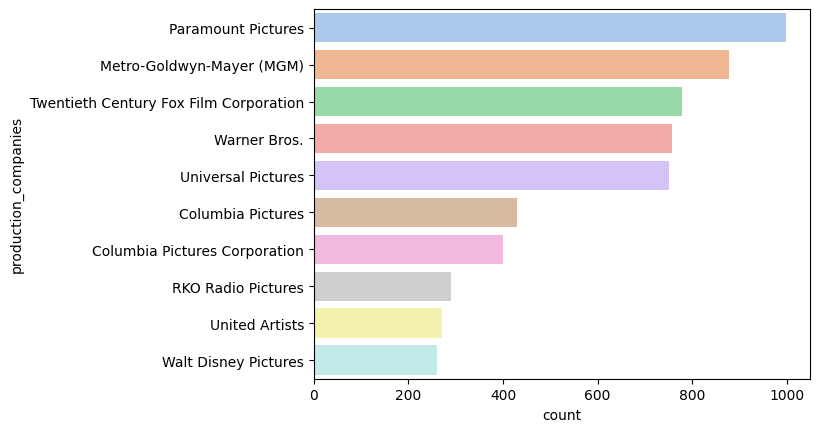

In [18]:
# productoras más frecuentes
top_productoras = df_movies['production_companies'].value_counts().head(10)
sns.barplot(x=top_productoras, y=top_productoras.index, palette='pastel')
plt.show()

Text(0.5, 0, 'Numero de peliculas lanzadas')

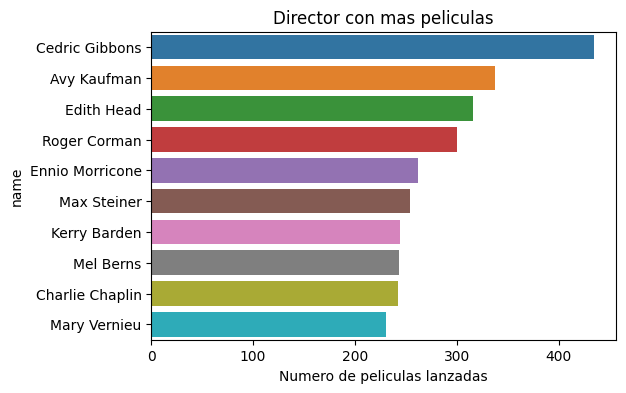

In [19]:
#Director con mayor numero de peliculas producidas
df_director= pd.read_csv('./API/director.csv')


plt.figure(figsize=(6,4))
sns.barplot(y=df_director['name'].value_counts()[:10].index, x=df_director['title'].value_counts()[:10])
plt.title('Director con mas peliculas')
plt.xlabel('Numero de peliculas lanzadas')



### Distribucion de variables con Boxplot, resaltando Outliers(valores atípicos)


Text(0.5, 1.0, 'Distribucion del tiempo')

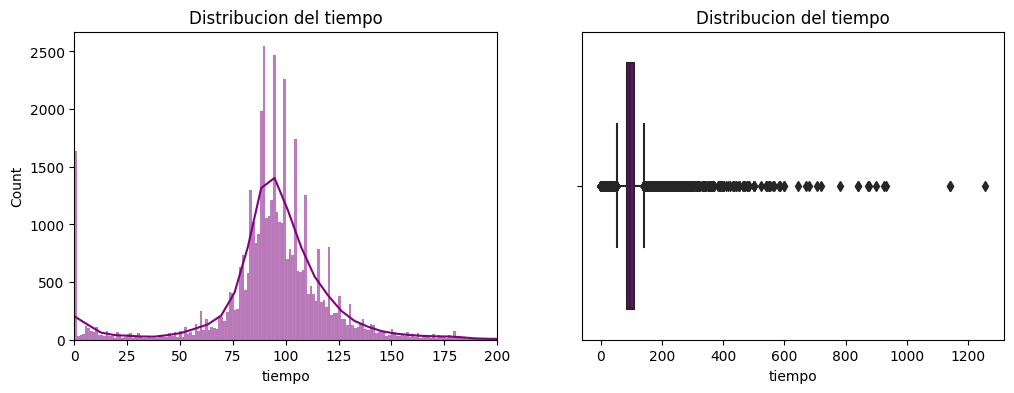

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=df_movies, x="runtime", ax=ax[0],  kde=True, color="purple")
ax[0].set_xlabel('tiempo')
ax[0].set_title('Distribucion del tiempo')
ax[0].set_xlim(0, 200)

sns.boxplot(data=df_movies, x="runtime", ax=ax[1], color="purple")
ax[1].set_xlabel('tiempo')
ax[1].set_title('Distribucion del tiempo')

Tendencia de la duracion de las peliculas a lo largo de los años

C:\Users\clari\AppData\Local\Temp\ipykernel_9020\3210823198.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=duracion_año, x='release_year', y='runtime', palette='pastel')


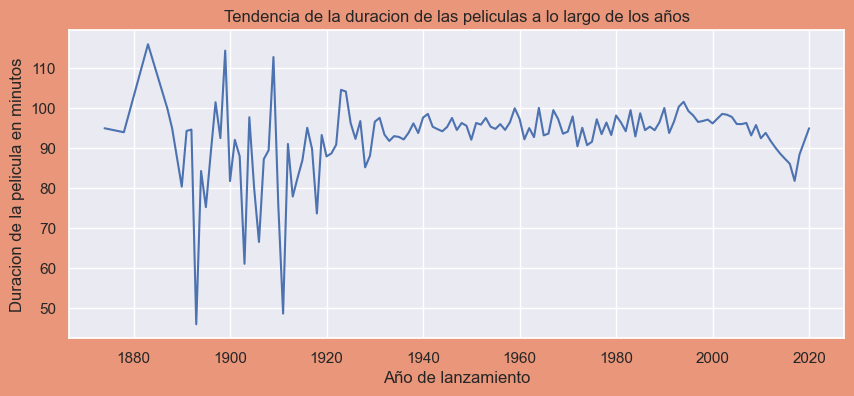

In [21]:
# Convierto la columna 'runtime' a numérica
df_movies['runtime'] = pd.to_numeric(df_movies['runtime'], errors='coerce')

# Agrupo y calculo el promedio de duración por año
duracion_año = df_movies.groupby('release_year')['runtime'].mean().reset_index()

# Ordeno los valores por año
duracion_año = duracion_año.sort_values('release_year')

# Grafico la tendencia de duración de películas
plt.figure(figsize=(10, 4),facecolor='darksalmon')
sns.set(style="darkgrid")
sns.lineplot(data=duracion_año, x='release_year', y='runtime', palette='pastel')
plt.ylabel('Duracion de la pelicula en minutos')
plt.xlabel('Año de lanzamiento')
plt.title('Tendencia de la duracion de las peliculas a lo largo de los años')

plt.show()


Entre 1880 y 1920 las peliculas duraban hasta 115 minutos
Desde el año 1940 se puede ver una tendencia constante en la duracion de las peliculas,que ronda entre los 90 y 100 minutos.

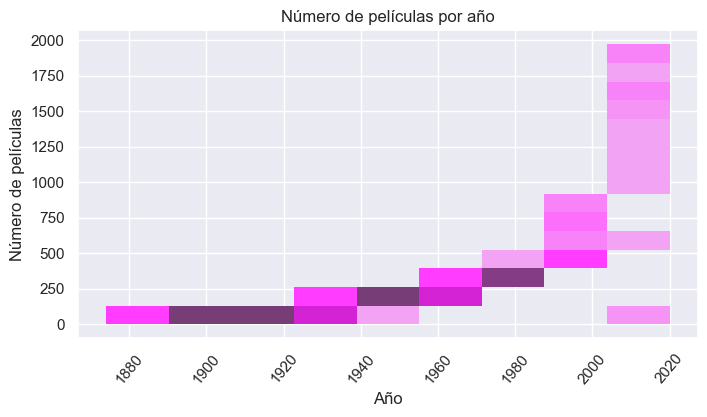

In [22]:
#Peliculas por año
pelicula_año = df_movies['release_year'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.histplot(x=pelicula_año.index, y=pelicula_año.values, color="purple")
plt.xticks(rotation=50)

plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.title('Número de películas por año')

plt.show()

Text(0.5, 1.0, 'Número de películas por mes')

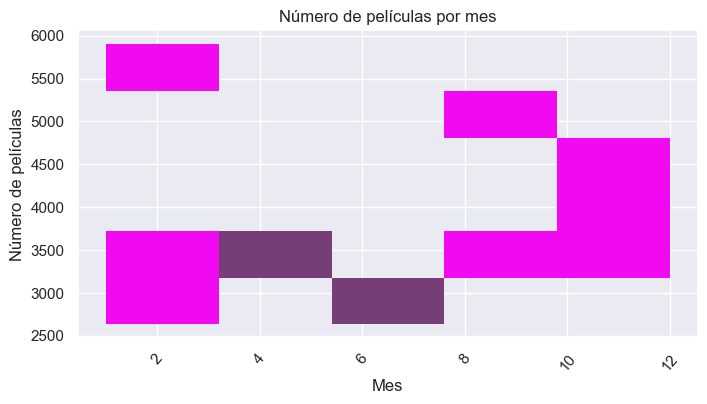

In [23]:
#Peliculas por mes
pelicula_mes= df_movies['release_month'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.histplot(x=pelicula_mes.index, y=pelicula_mes.values, color="purple")
plt.xticks(rotation=50)

plt.xlabel('Mes')
plt.ylabel('Número de películas')
plt.title('Número de películas por mes')


### Nube de palabras realizada manualmente(no logre importar wordcloud)

In [25]:
titulos=list(df_movies['title'])

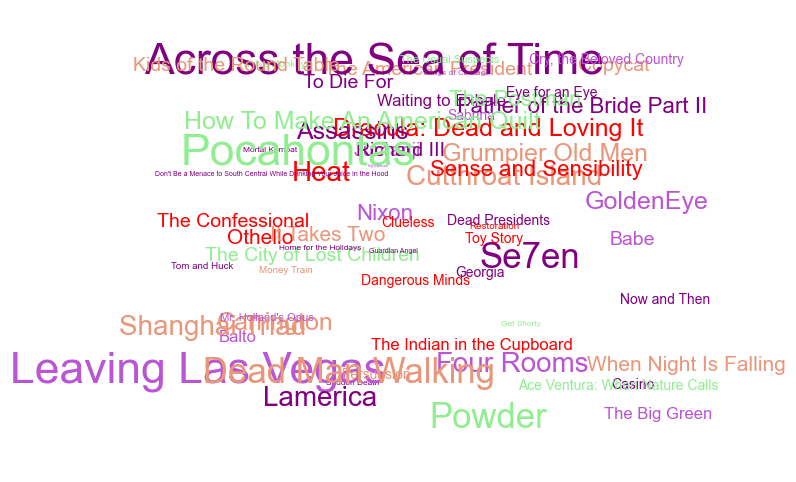

In [26]:
import random
from collections import Counter

# Lista de títulos
title_list = titulos

# Obtener las frecuencias de los títulos
title_counts = Counter(title_list)

# Crear una lista de tamaños de fuente basados en las frecuencias
font_sizes = [10, 14, 18, 12, 16, 20, 10, 7, 6, 18, 14, 18, 12, 16, 20,10, 16, 20, 10, 7, 6, 14, 18, 25, 32, 15, 10,10, 14,20, 10, 7, 6, 14, 18, 25, 32, 15, 10,10, 14, 10, 7, 6, 14, 18, 25, 32, 15,8,5,2,20,12,10,14,6,16,14,12,10,8,5]

# Crear la nube de palabras manualmente
plt.figure(figsize=(8, 6))
for title, count, font_size in zip(title_counts.keys(), title_counts.values(), font_sizes):
    x = random.uniform(0.1, 0.9)
    y = random.uniform(0.1, 0.9)
    color = random.choice(['red', 'darksalmon', 'lightgreen', 'purple', 'mediumorchid'])  # Cambia los colores aquí
    plt.text(x, y, title, fontsize=font_size, ha='center', va='center', color=color)
plt.axis('off')
plt.show()
